# Demonstration File

In [1]:
#Import necessary libraries
import test_manifold_algorithms as tma
from DIG import DIG
from SPUD import SPUD
import matplotlib.pyplot as plt
import numpy as np

#Prep the domains
dc = tma.test_manifold_algorithms("seeds.csv", split = "even", verbose = 3, random_state=2816)

/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-06-20 13:52:20.806172: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 13:52:20.810275: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 13:52:20.864443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 13:52:22.491


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (199, 4)
Split B Features shape (199, 3)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


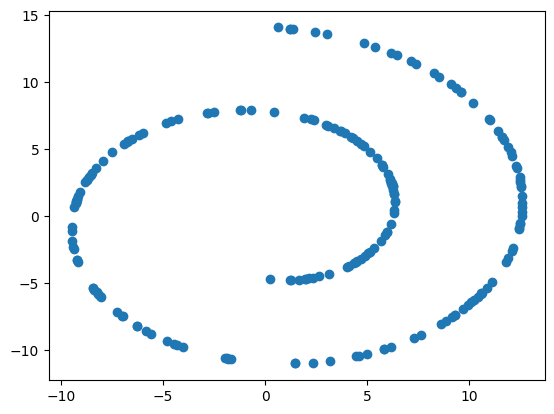

In [6]:
plt.scatter( x= dc.split_A[:, 0], y = dc.split_A[:, 2])

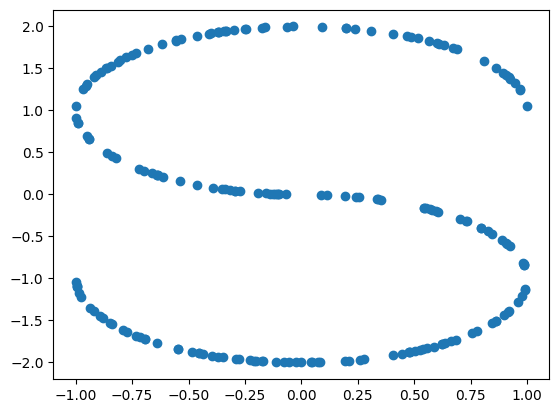

In [7]:
plt.scatter( x= dc.split_B[:, 0], y = dc.split_B[:, 2])

# SPUD Demonstration

In [8]:
dc.anchors[:22]

array([[115, 115],
       [ 54,  54],
       [ 85,  85],
       [ 70,  70],
       [ 40,  40],
       [186, 186],
       [100, 100],
       [191, 191],
       [110, 110],
       [137, 137],
       [183, 183],
       [176, 176],
       [114, 114],
       [134, 134],
       [118, 118],
       [ 77,  77],
       [153, 153],
       [ 16,  16],
       [ 38,  38],
       [ 44,  44],
       [ 11,  11],
       [ 14,  14]])

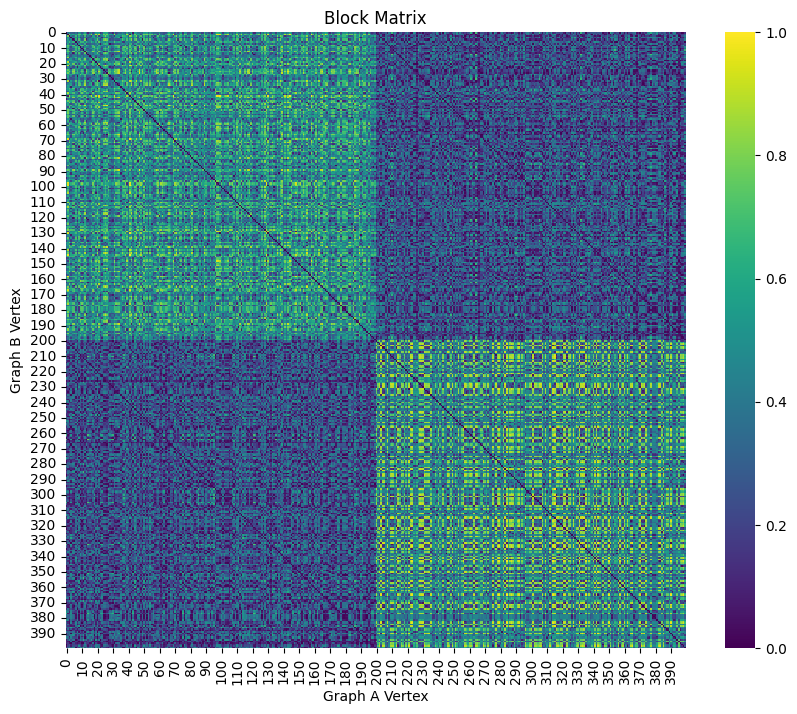

In [10]:
#Create the SPUD class 
spud = SPUD(dc.split_A, dc.split_B, known_anchors=dc.anchors[:22], knn = 27, operation = "abs", show = True)

In [13]:
np.argmin(spud.block[190]), spud.block[190, 190]

(190, 0.0)

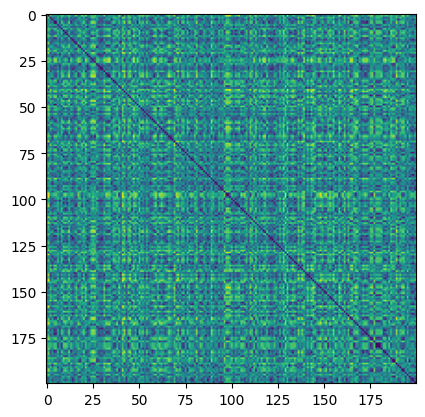

In [27]:
#Within each data set (A and B) we are able to create a distance measure based on measurements within the same graph
plt.imshow(spud.pure_matrix_A)

In [28]:
#Continuing on, SPUD will then determine the shortests paths from every Node to every other Node
spud.node_paths_A[0][:5] #This is showing the paths of node 0 to the first five anchors: 163, 28, 6, 189, and 70

[[0, 7, 115], [0, 199, 45, 54], [0, 59, 85], [0, 70], [0, 7, 40]]

In [29]:
#With those node paths, we then calculate the total distance of traversing along that path
spud.all_dist_to_anchors_A.shape, spud.all_dist_to_anchors_A[0, :5]

((200, 22),
 array([0.24791839, 0.60441054, 0.39334768, 0.15932555, 0.30062517]))

Model Stress: 2511.070554562043
Cross Embedding: 0.95
FOSCTTM: 0.06365


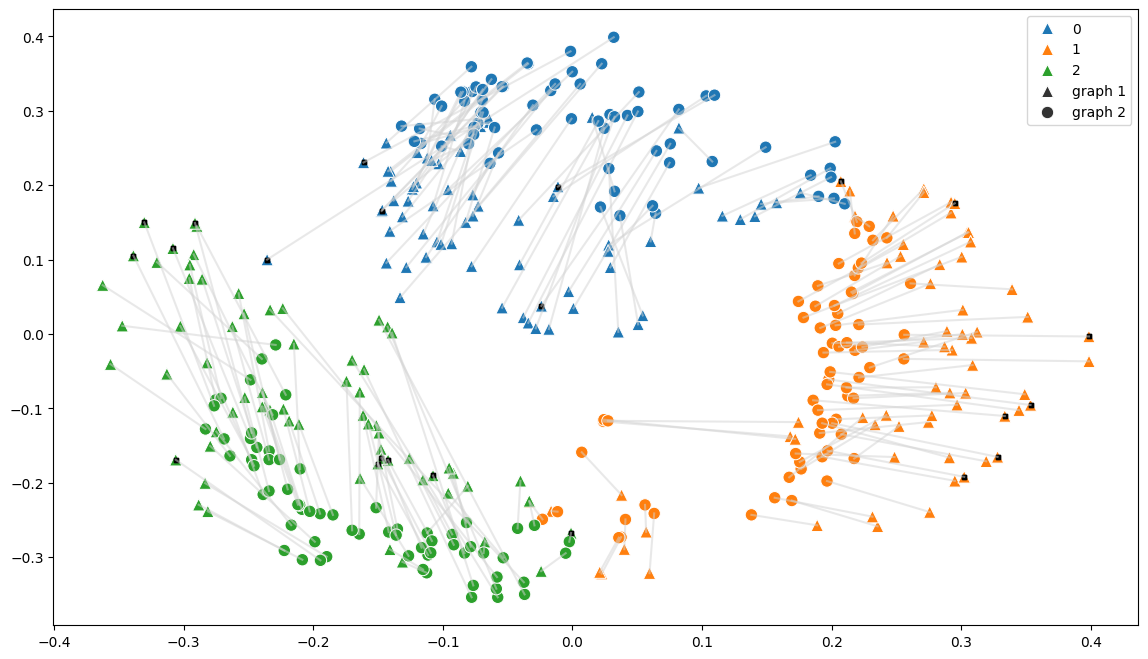

In [30]:
spud.plot_emb(dc.labels_doubled)

## Testing Shortest Paths Methodology

Model Stress: 1445.0004547921283
Cross Embedding: 0.8693467336683417
FOSCTTM: 0.16456655134971337


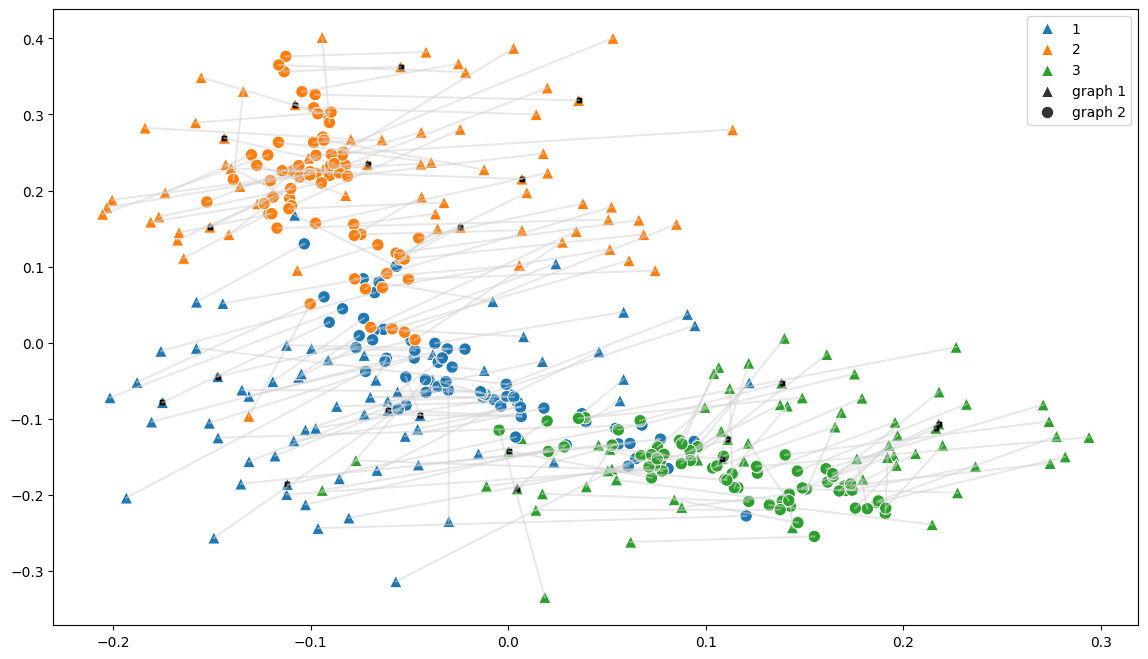

In [2]:
original_spud = SPUD(dc.split_A, dc.split_B, dc.anchors[:20], operation = "average")
original_spud.plot_emb(dc.labels_doubled)

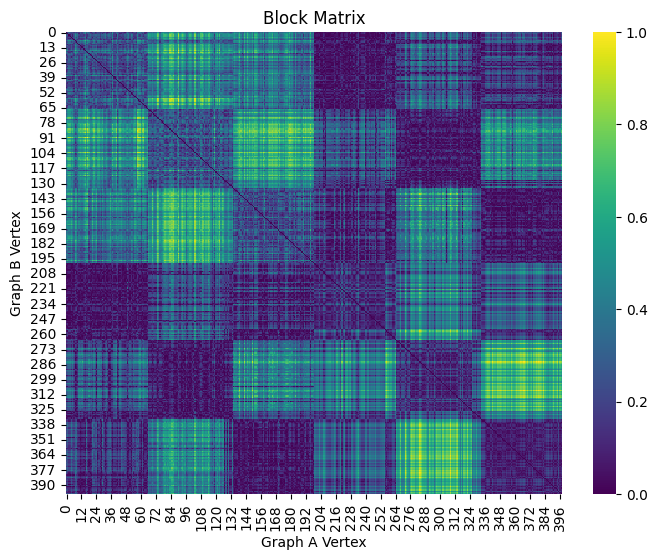

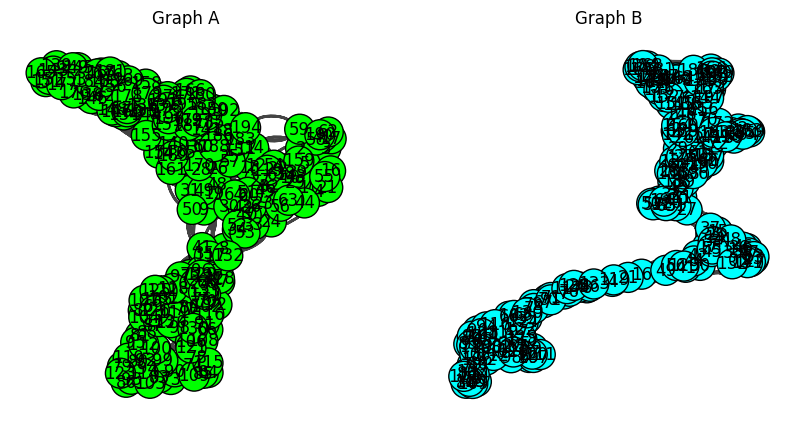

In [3]:
original_spud.plot_graphs()

# Dig Prediction Probabilities

In [5]:
dig = DIG(dc.split_A, dc.split_B, known_anchors = dc.anchors[:22], t = -1, knn = 5, link = "None", density_normalization=False, verbose = 3)

/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:236: UserWarning: Metric cosine not valid for `sklearn.neighbors.BallTree`. Graph instantiation may be slower than normal.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:236: UserWarning: Metric cosine not valid for `sklearn.neighbors.BallTree`. Graph instantiation may be slower than normal.
  warnings.warn(


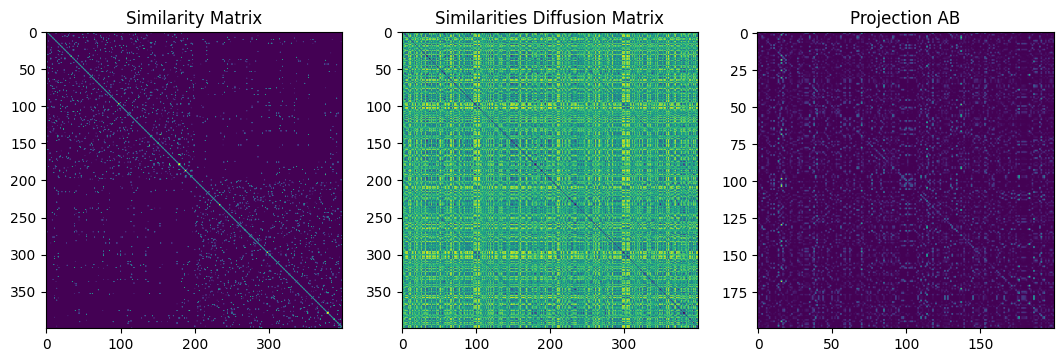

In [6]:
dig.plot_graphs()

In [7]:
dig.predict_feature()[19], dc.split_B[19]

(array([0.48217171, 0.73265743, 0.08050632]),
 array([ 0.95978968,  1.47123834, -1.2807201 ]))

Model Stress: 1012.1704708596903
Cross Embedding: 0.775
FOSCTTM: 0.0877


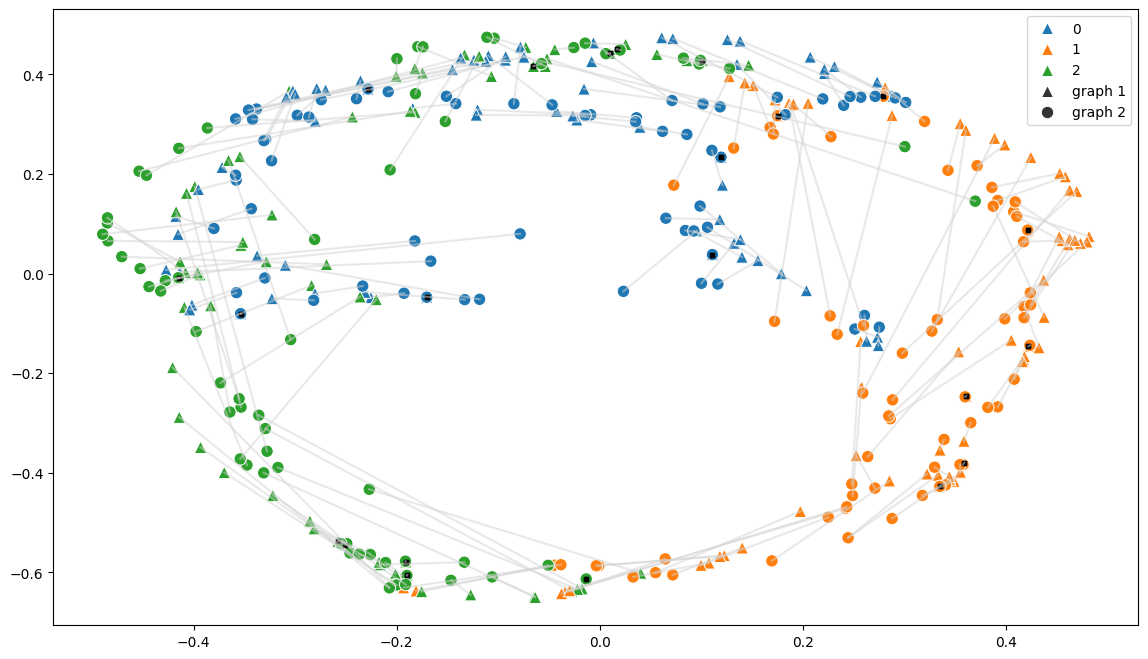

In [8]:
dig.plot_emb(dc.labels_doubled)

# Testing with Timeless Variables

In [118]:
import pandas as pd
timeless = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Python_Files/Timeless.csv")
timeless = timeless.fillna(-4).drop(columns = ["PTRACCAT"])

In [119]:
timeless.sample(5)

,RID,PTEDUCAT,PTHAND,MOTHAD,FATHAD,MOTHDEM,FATHDEM,PHS,CIR,MOTHSXAGE,FATHSXAGE,PTGENDER,PTDOBYY,PTPLANG,PTETHCAT,PTIDENT,PTENGSPK,PTETHCATH
304,306,13.0,1.0,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.0,-4.0,1.0,1930.0,-4.0,-4.0,-4.0,-4.0,-4.0
626,629,20.0,1.0,-4.0,-4.0,-4.0,-4.0,2.364390,0.307706,-4.0,-4.0,1.0,1935.0,1.0,2.0,-4.0,-4.0,-4.0
2699,4865,18.0,1.0,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.0,-4.0,1.0,1945.0,1.0,2.0,-4.0,-4.0,-4.0
114,116,18.0,1.0,-4.0,-4.0,-4.0,-4.0,-0.262221,0.061874,-4.0,-4.0,1.0,1927.0,1.0,2.0,-4.0,-4.0,-4.0
3020,5188,19.0,1.0,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.0,-4.0,1.0,1933.0,1.0,2.0,-4.0,-4.0,-4.0


In [120]:
len(timeless.columns), len(timeless)

(18, 4385)

In [121]:
np.array(timeless)[:, 1]

array([18., 16., 18., ...,  8., -4., -4.])

In [122]:
domain_a = np.array(timeless)[:200, :10].astype(float)
domain_b = np.array(timeless)[:200, 10:].astype(float)

In [123]:
dc.anchors[:22]

array([[115, 115],
       [ 54,  54],
       [ 85,  85],
       [ 70,  70],
       [ 40,  40],
       [186, 186],
       [100, 100],
       [191, 191],
       [110, 110],
       [137, 137],
       [183, 183],
       [176, 176],
       [114, 114],
       [134, 134],
       [118, 118],
       [ 77,  77],
       [153, 153],
       [ 16,  16],
       [ 38,  38],
       [ 44,  44],
       [ 11,  11],
       [ 14,  14]])

In [125]:
domain_a.shape

(200, 10)

In [126]:
dig_time = DIG(domain_a, domain_b, known_anchors= dc.anchors[:22], t = -1, knn = 2, link = "None", verbose = 2)

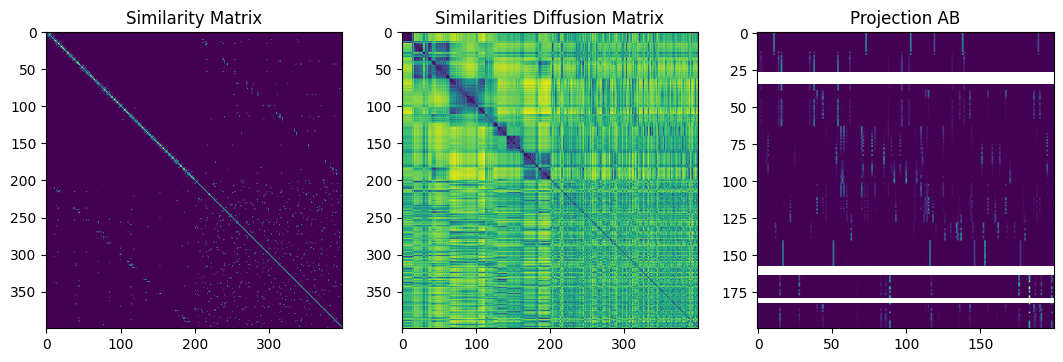

In [127]:
dig_time.plot_graphs()

Model Stress: 1280.2896694976776
Can't calculate the Cross embedding
FOSCTTM: 0.030225


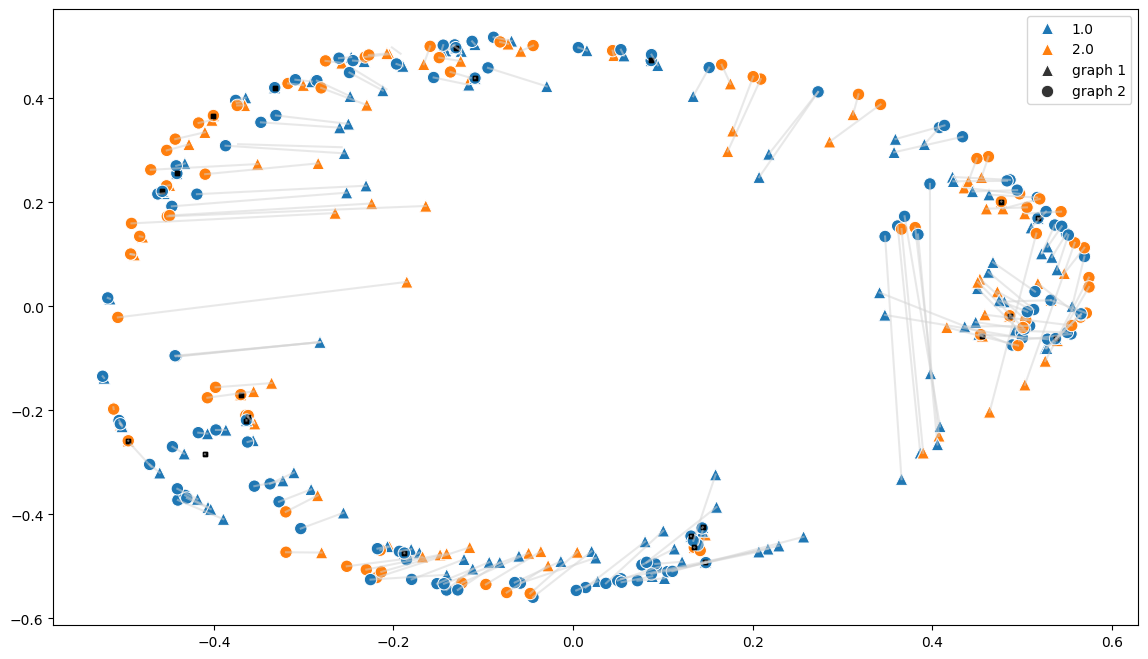

In [132]:
timeless = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Python_Files/Timeless.csv")

dig.plot_emb(labels = pd.concat([timeless["PTGENDER"][:200], timeless["PTGENDER"][:200]]))